In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [2]:

load_data = pd.read_excel("/content/drive/MyDrive/Load Data in kW (1).xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [3]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [4]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fd4d6599710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd4d65b2590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4d65b6dd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4d65b6610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd4d65af450>,
  <matplotlib.lines.Line2D at 0x7fd4d65afd10>]}

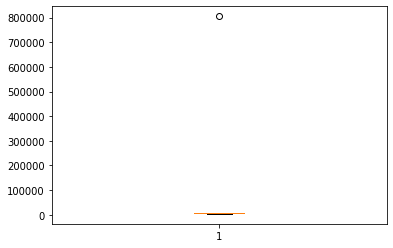

In [5]:
plt.boxplot(load_data.iloc[:,0])

In [8]:

from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [9]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fd4d6033cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd4d6038d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4d603fd50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4d603f810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd4d6038290>,
  <matplotlib.lines.Line2D at 0x7fd4d60387d0>]}

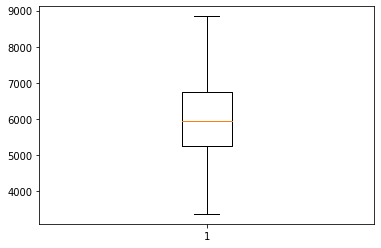

In [10]:
plt.boxplot(load_data.iloc[:,0])

In [11]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

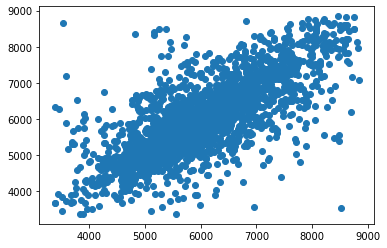

In [12]:
plt.scatter(x,y)

In [13]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))
  return -1*sum/len(d)

In [14]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500

In [15]:
x = minmax_scale(x)
y = minmax_scale(y)

In [16]:
data = []

for i in range(len(x)):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

2159


1943

In [17]:

error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c,v_m,v_c,momentum_coeff)
    deltac = -1*learning_rate*gradc(d,m,c,v_m,v_c,momentum_coeff)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)

epoch 0, batch 0, error 0.5110235454925459
epoch 0, batch 1, error 0.46746856721568486
epoch 0, batch 2, error 0.4428739680234212
epoch 0, batch 3, error 0.40470355836940414
epoch 1, batch 0, error 0.3701502778214269
epoch 1, batch 1, error 0.3207650620728613
epoch 1, batch 2, error 0.28022719138105845
epoch 1, batch 3, error 0.2357872917808251
epoch 2, batch 0, error 0.20227193487859602
epoch 2, batch 1, error 0.15882181535991852
epoch 2, batch 2, error 0.12823829596953853
epoch 2, batch 3, error 0.10220199513984703
epoch 3, batch 0, error 0.07823035048518656
epoch 3, batch 1, error 0.05772625395040708
epoch 3, batch 2, error 0.04192211813794811
epoch 3, batch 3, error 0.029097810833849647
epoch 4, batch 0, error 0.02377794152163573
epoch 4, batch 1, error 0.015318050523878498
epoch 4, batch 2, error 0.010425195651646315
epoch 4, batch 3, error 0.008685141338281722
epoch 5, batch 0, error 0.009442831044324144
epoch 5, batch 1, error 0.008980070927009226
epoch 5, batch 2, error 0.01121

Text(0.5, 1.0, 'error graph')

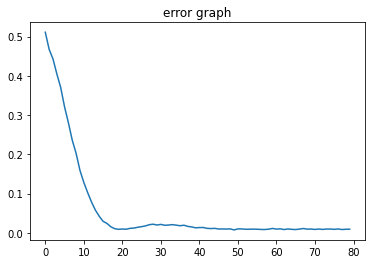

In [18]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [19]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.008944174736314123
test error : 0.00818312008971291


In [20]:
print(m,c)

0.6258457337934812 0.1871604379816984


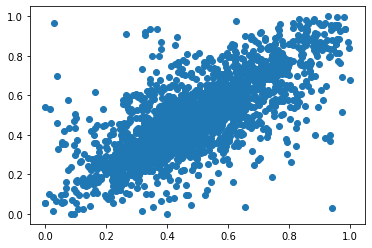

In [21]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

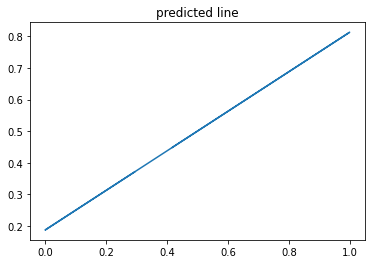

In [22]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

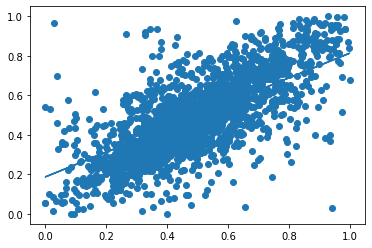

In [23]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [24]:

input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4478
predicted load for this hour is :  5088.9980457330785
